<a href="https://colab.research.google.com/github/DanielLimaFerreira/KNN-titanic/blob/main/KNN_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [4]:
#Saber a porcentagem dos valores nulos
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
#Preenche as idades nulas com a idade média
idade_media = int(df['Age'].mean())
df.loc[:,'Age'] = df['Age'].fillna(idade_media)

In [6]:
#Exclui a coluna com mais de 600 valores nulos
df.dropna(axis=1, thresh=600,inplace=True)

In [7]:
df.isna().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [8]:
#Deleta a linha que possui nulos na coluna 'Embarked'
df.dropna(axis=0,subset=['Embarked'], inplace=True)

In [9]:
#Removendo colunas desnecessárias
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace= True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Aplicando o one-hot encoding
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
#Aplicando o Min-Max scaling, para transformar os dados no intervalo[0,1]
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [14]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0
886,0.0,1.0,0.359135,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,0.0


In [16]:
#Colocando em uma variável as features e o target
target = 'Survived'
features = list(df.columns)
features.remove(target)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2,random_state=42)

In [21]:
#Importando o classificador
from sklearn.neighbors import KNeighborsClassifier

#Criando o modelo que usa somente um vizinho
clf = KNeighborsClassifier(n_neighbors=1)
#Treinando o modelo nos dados de treino
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
y_pred = clf.predict(X_val)

In [24]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print('Acurácia:', acc)

Acurácia: 0.7415730337078652


In [25]:
#Otimização de hiperparâmetro(hyperparameter tuning)
#Criando lista com todos os números de vizinhos que queremos testar
n_vizinhos = np.arange(1,11)

#Criando uma lista para guardarmos os resultados
resultados = []

for k in n_vizinhos:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_val, y_pred)

  resultados.append(acc)

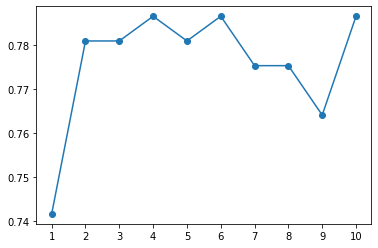

In [28]:
plt.plot(n_vizinhos, resultados, '-o')
plt.xticks(n_vizinhos);